# 3. FINAL DATA PROFILING - CLEANED DATASET

This notebook performs data profiling on the **fully cleaned dataset** after running:
- **1. Data Profiling & Quality Assessment** - Initial inspection
- **2a. Data Transformation & Standardization** - Text normalization, typo correction, wrangling
- **2b. Error Detection & Correction** - Address repair, missing values imputation, outlier detection
- **2c. Data Deduplication** - Exact and near-duplicate removal

## Contents:
1. Load the cleaned dataset
2. Data overview and structure
3. Completeness analysis (missing values)
4. Statistical profiling (numerical columns)
5. Categorical profiling (value distributions)
6. Automatic profiling with ydata_profiling
7. Before vs After comparison

## 3.1 Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import json

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 140)
%matplotlib inline

## 3.2 Load the Cleaned Dataset

In [2]:
# Load the final deduplicated dataset (after all cleaning steps)
MILANO_CLEAN = pd.read_csv("MILANO_deduplicated.csv", sep=";")
print(f"Cleaned dataset shape: {MILANO_CLEAN.shape[0]} rows x {MILANO_CLEAN.shape[1]} columns")

# Also load original for comparison
MILANO_ORIG = pd.read_csv("Comune-di-Milano-Pubblici-esercizi(in)-2.csv", sep=";")
print(f"Original dataset shape: {MILANO_ORIG.shape[0]} rows x {MILANO_ORIG.shape[1]} columns")

print(f"\nRows removed during cleaning: {MILANO_ORIG.shape[0] - MILANO_CLEAN.shape[0]}")
print(f"Columns added during cleaning: {MILANO_CLEAN.shape[1] - MILANO_ORIG.shape[1]}")

Cleaned dataset shape: 6903 rows x 16 columns
Original dataset shape: 6904 rows x 13 columns

Rows removed during cleaning: 1
Columns added during cleaning: 3


In [3]:
# Preview cleaned data
MILANO_CLEAN.head()

,Tipo esercizio storico pubblico esercizio,Insegna,Indirizzo,Tipo via,Nome via,Civico,Codice via,ZD,Forma commercio,Forma commercio precedente,Forma vendita,Settore storico pubblico esercizio,Superficie somministrazione,Tipo_macro,Forma vendita_filled,is_outlier_superficie
0,ristorante,unknown,alz naviglio grande n. 12 ; isolato:057; (z.d. 6),alz,naviglio grande,12,5144,6,solo somministrazione,somministrazione,al tavolo,"ristorante, trattoria, osteria;genere merceol....",83.0,RISTORANTE,non dichiarata,False
1,bar caffè,unknown,alz naviglio grande n. 44 (z.d. 6),alz,naviglio grande,44,5144,6,solo somministrazione,somministrazione,al banco,bar gastronomici e simili,26.0,BAR,non dichiarata,False
2,bar caffè,unknown,alz naviglio grande n. 48 (z.d. 6),alz,naviglio grande,48,5144,6,solo somministrazione,somministrazione,al banco,bar gastronomici e simili,58.0,BAR,non dichiarata,False
3,"ristorante, trattoria, osteria",unknown,alz naviglio grande n. 8 (z.d. 6),alz,naviglio grande,8,5144,6,solo somministrazione,somministrazione,al tavolo,"bar caffè e simili;ristorante, trattoria, osteria",101.0,RISTORANTE,non dichiarata,False
4,bar caffè,unknown,alz naviglio pavese n. 24 (z.d. 6),alz,naviglio pavese,24,5161,6,solo somministrazione,somministrazione,al banco,bar gastronomici e simili,51.0,BAR,non dichiarata,False


## 3.3 Data Structure Overview

In [4]:
# Column names
print("Columns in cleaned dataset:")
print(MILANO_CLEAN.columns.tolist())

Columns in cleaned dataset:
['Tipo esercizio storico pubblico esercizio', 'Insegna', 'Indirizzo', 'Tipo via', 'Nome via', 'Civico', 'Codice via', 'ZD', 'Forma commercio', 'Forma commercio precedente', 'Forma vendita', 'Settore storico pubblico esercizio', 'Superficie somministrazione', 'Tipo_macro', 'Forma vendita_filled', 'is_outlier_superficie']


In [5]:
# Data types
print("Data types:")
MILANO_CLEAN.dtypes

Data types:


Tipo esercizio storico pubblico esercizio     object
Insegna                                       object
Indirizzo                                     object
Tipo via                                      object
Nome via                                      object
Civico                                        object
Codice via                                     int64
ZD                                             int64
Forma commercio                               object
Forma commercio precedente                    object
Forma vendita                                 object
Settore storico pubblico esercizio            object
Superficie somministrazione                  float64
Tipo_macro                                    object
Forma vendita_filled                          object
is_outlier_superficie                           bool
dtype: object

In [6]:
# Separate numerical and categorical columns
NUM = list(MILANO_CLEAN.select_dtypes(include=['int64', 'float64']).columns)
CAT = list(MILANO_CLEAN.select_dtypes(include=['bool', 'object']).columns)

print(f"Numerical columns ({len(NUM)}): {NUM}")
print(f"Categorical columns ({len(CAT)}): {CAT}")

Numerical columns (3): ['Codice via', 'ZD', 'Superficie somministrazione']
Categorical columns (13): ['Tipo esercizio storico pubblico esercizio', 'Insegna', 'Indirizzo', 'Tipo via', 'Nome via', 'Civico', 'Forma commercio', 'Forma commercio precedente', 'Forma vendita', 'Settore storico pubblico esercizio', 'Tipo_macro', 'Forma vendita_filled', 'is_outlier_superficie']


---
# 4. COMPLETENESS ANALYSIS

Check for any remaining missing values after cleaning.

In [7]:
# Missing values summary
null_counts = MILANO_CLEAN.isnull().sum()
null_pct = (null_counts / len(MILANO_CLEAN) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': null_counts.index,
    'Missing Count': null_counts.values,
    'Missing %': null_pct.values
}).sort_values('Missing %', ascending=False)

print("=== MISSING VALUES IN CLEANED DATASET ===")
missing_with_nulls = missing_df[missing_df['Missing Count'] > 0]
if len(missing_with_nulls) > 0:
    display(missing_with_nulls)
else:
    print("✓ No missing values! Dataset is complete.")

=== MISSING VALUES IN CLEANED DATASET ===


,Column,Missing Count,Missing %
11,Settore storico pubblico esercizio,21,0.30
8,Forma commercio,1,0.01
9,Forma commercio precedente,1,0.01


In [8]:
# Compare completeness: Before vs After
orig_missing = MILANO_ORIG.isnull().sum().sum()
clean_missing = MILANO_CLEAN.isnull().sum().sum()

orig_cells = MILANO_ORIG.shape[0] * MILANO_ORIG.shape[1]
clean_cells = MILANO_CLEAN.shape[0] * MILANO_CLEAN.shape[1]

print("=== COMPLETENESS COMPARISON ===")
print(f"Original dataset:")
print(f"  Total cells: {orig_cells}")
print(f"  Missing cells: {orig_missing} ({orig_missing/orig_cells*100:.2f}%)")
print(f"\nCleaned dataset:")
print(f"  Total cells: {clean_cells}")
print(f"  Missing cells: {clean_missing} ({clean_missing/clean_cells*100:.2f}%)")

=== COMPLETENESS COMPARISON ===
Original dataset:
  Total cells: 89752
  Missing cells: 9411 (10.49%)

Cleaned dataset:
  Total cells: 110448
  Missing cells: 23 (0.02%)


---
# 5. NUMERICAL PROFILING

In [9]:
# Descriptive statistics for numerical columns
MILANO_CLEAN[NUM].describe()

,Codice via,ZD,Superficie somministrazione
count,6903.000000,6903.000000,6903.000000
mean,3554.944517,4.572939,85.980679
std,2239.136777,2.763734,89.269232
min,1.000000,1.000000,2.000000
25%,1510.000000,2.000000,42.000000
50%,3129.000000,4.000000,64.000000
75%,5294.000000,7.000000,100.000000
max,7602.000000,9.000000,2336.000000


In [10]:
# Profiling metrics for each numerical column
ROWS = len(MILANO_CLEAN)

num_profile = []
for col in NUM:
    count = MILANO_CLEAN[col].count()
    distinct = MILANO_CLEAN[col].nunique()
    uniqueness = distinct / ROWS
    distinctness = distinct / count if count > 0 else 0
    
    num_profile.append({
        'Column': col,
        'Count': count,
        'Missing': ROWS - count,
        'Distinct': distinct,
        'Uniqueness': round(uniqueness, 4),
        'Distinctness': round(distinctness, 4),
        'Min': MILANO_CLEAN[col].min(),
        'Max': MILANO_CLEAN[col].max(),
        'Mean': round(MILANO_CLEAN[col].mean(), 2),
        'Std': round(MILANO_CLEAN[col].std(), 2)
    })

pd.DataFrame(num_profile)

,Column,Count,Missing,Distinct,Uniqueness,Distinctness,Min,Max,Mean,Std
0,Codice via,6903,0,1856,0.2689,0.2689,1.0,7602.0,3554.94,2239.14
1,ZD,6903,0,9,0.0013,0.0013,1.0,9.0,4.57,2.76
2,Superficie somministrazione,6903,0,451,0.0653,0.0653,2.0,2336.0,85.98,89.27


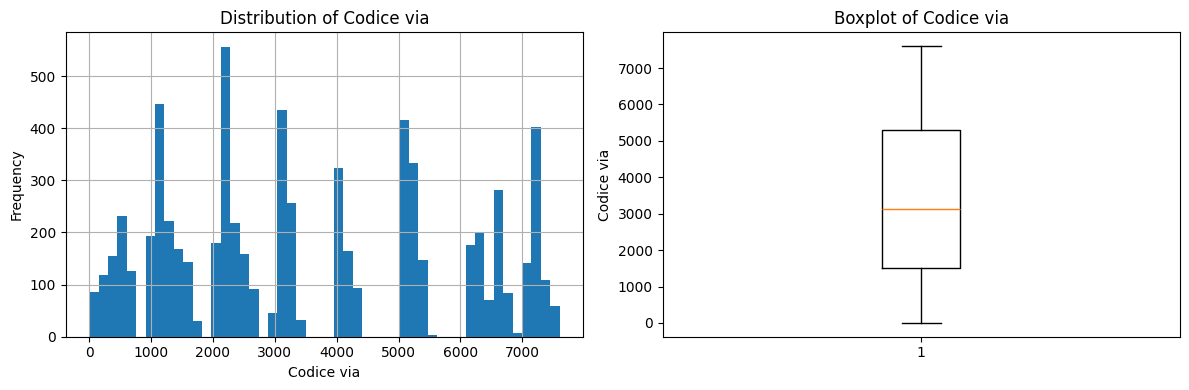

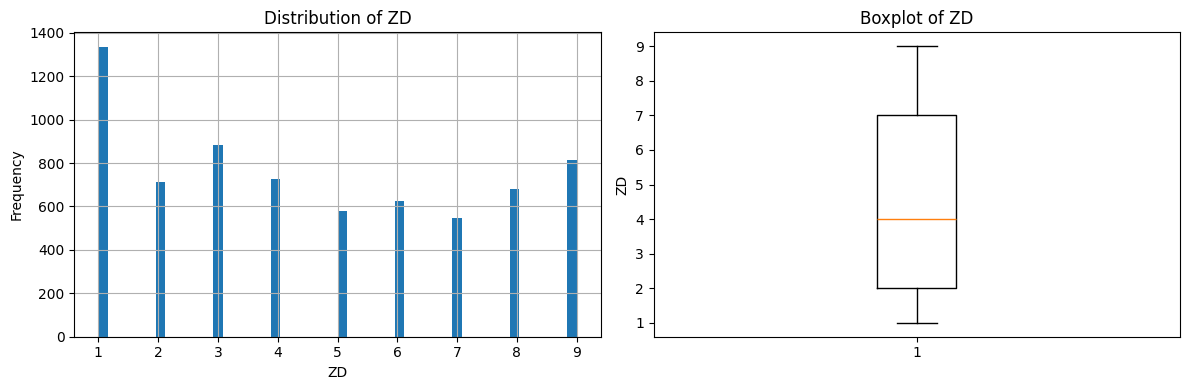

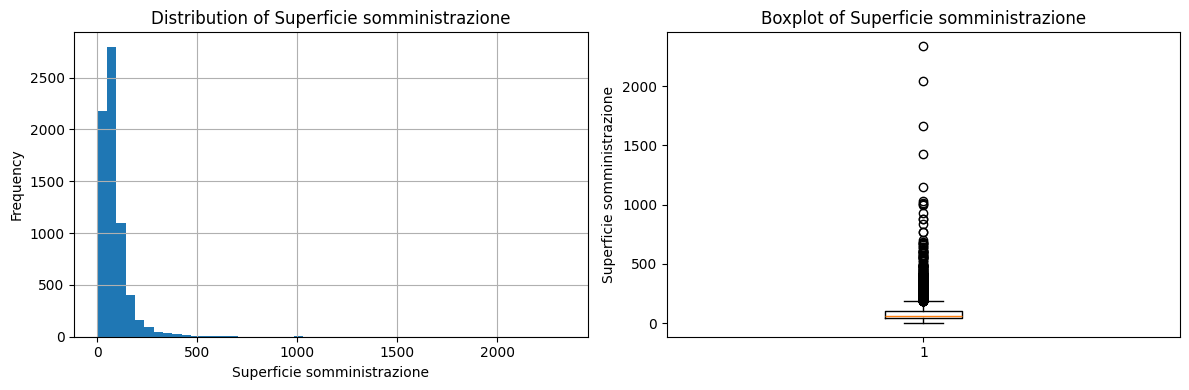

In [11]:
# Distribution plots for numerical columns
for col in NUM:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    MILANO_CLEAN[col].hist(bins=50, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    
    # Boxplot
    axes[1].boxplot(MILANO_CLEAN[col].dropna())
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

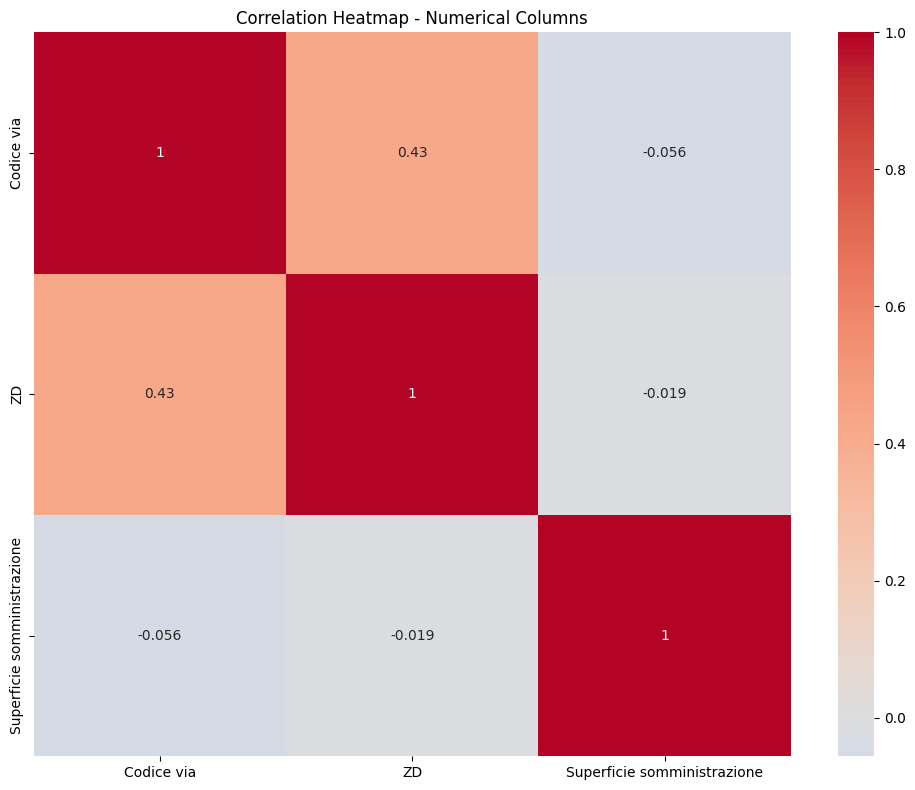

In [12]:
# Correlation heatmap (if multiple numerical columns)
if len(NUM) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(MILANO_CLEAN[NUM].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title("Correlation Heatmap - Numerical Columns")
    plt.tight_layout()
    plt.show()

---
# 6. CATEGORICAL PROFILING

In [13]:
# Profiling metrics for categorical columns
cat_profile = []
for col in CAT:
    count = MILANO_CLEAN[col].count()
    distinct = MILANO_CLEAN[col].nunique()
    uniqueness = distinct / ROWS
    distinctness = distinct / count if count > 0 else 0
    mode_val = MILANO_CLEAN[col].mode()[0] if len(MILANO_CLEAN[col].mode()) > 0 else 'N/A'
    mode_freq = MILANO_CLEAN[col].value_counts().iloc[0] if count > 0 else 0
    constancy = mode_freq / count if count > 0 else 0
    
    cat_profile.append({
        'Column': col,
        'Count': count,
        'Missing': ROWS - count,
        'Distinct': distinct,
        'Uniqueness': round(uniqueness, 4),
        'Distinctness': round(distinctness, 4),
        'Mode': mode_val,
        'Mode Frequency': mode_freq,
        'Constancy': round(constancy, 4)
    })

pd.DataFrame(cat_profile)

,Column,Count,Missing,Distinct,Uniqueness,Distinctness,Mode,Mode Frequency,Constancy
0,Tipo esercizio storico pubblico esercizio,6903,0,23,0.0033,0.0033,bar caffè,4272,0.6189
1,Insegna,6903,0,2883,0.4176,0.4176,unknown,3409,0.4938
2,Indirizzo,6903,0,6278,0.9095,0.9095,via chiese n. 60 con ingresso in viale sarca; ...,7,0.0010
3,Tipo via,6903,0,16,0.0023,0.0023,via,5089,0.7372
4,Nome via,6903,0,1840,0.2666,0.2666,monza,74,0.0107
5,Civico,6903,0,264,0.0382,0.0382,2,481,0.0697
6,Forma commercio,6902,1,2,0.0003,0.0003,solo somministrazione,6332,0.9174
7,Forma commercio precedente,6902,1,2,0.0003,0.0003,somministrazione,6782,0.9826
8,Forma vendita,6903,0,4,0.0006,0.0006,al banco,3026,0.4384
9,Settore storico pubblico esercizio,6882,21,3975,0.5758,0.5776,genere merceol.autorizz.sanit.,214,0.0311


In [14]:
# Value counts for key categorical columns
key_cats = [
    "Tipo_macro", 
    "Forma commercio", 
    "Forma vendita", 
    "Tipo via",
    "ZD"
]

for c in key_cats:
    if c in MILANO_CLEAN.columns:
        print(f"\n=== {c} ===")
        display(MILANO_CLEAN[c].value_counts().head(10))


=== Tipo_macro ===


Tipo_macro
BAR            3653
RISTORANTE     2734
GASTRONOMIA     246
PIZZERIA        246
ALTRO            21
GELATERIA         3
Name: count, dtype: int64


=== Forma commercio ===


Forma commercio
solo somministrazione      6332
somministrazione/minuto     570
Name: count, dtype: int64


=== Forma vendita ===


Forma vendita
al banco        3026
misto           2283
al tavolo       1546
self service      48
Name: count, dtype: int64


=== Tipo via ===


Tipo via
via    5089
vle     831
cso     359
pza     326
ple     129
lgo      44
alz      41
rip      33
gll      22
pta       8
Name: count, dtype: int64


=== ZD ===


ZD
1    1335
3     884
9     814
4     725
2     711
8     679
6     627
5     579
7     549
Name: count, dtype: int64

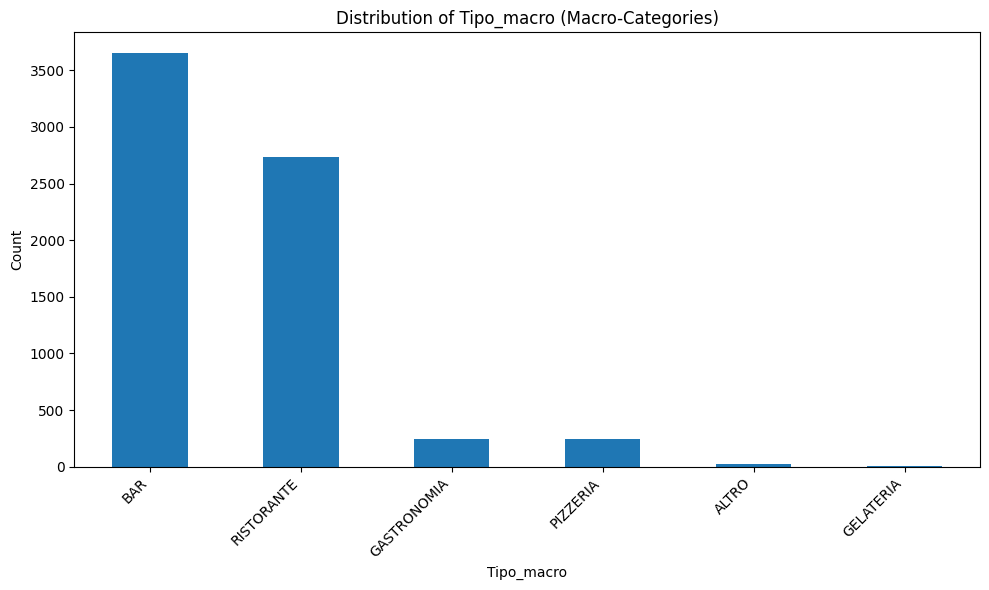

In [15]:
# Distribution of Tipo_macro (if exists)
if 'Tipo_macro' in MILANO_CLEAN.columns:
    plt.figure(figsize=(10, 6))
    MILANO_CLEAN['Tipo_macro'].value_counts().plot(kind='bar')
    plt.title('Distribution of Tipo_macro (Macro-Categories)')
    plt.xlabel('Tipo_macro')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

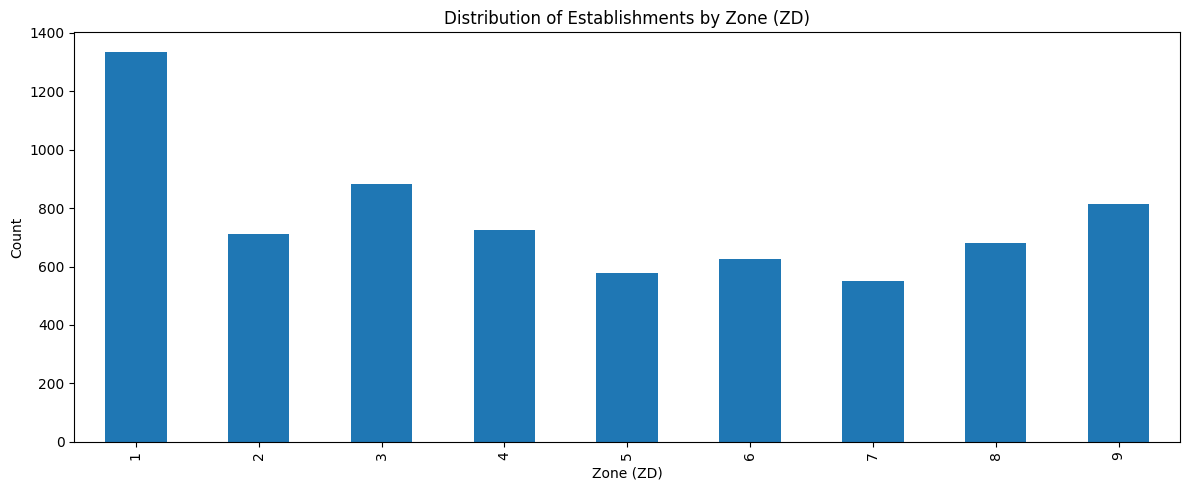

In [16]:
# Distribution by Zone (ZD)
if 'ZD' in MILANO_CLEAN.columns:
    plt.figure(figsize=(12, 5))
    MILANO_CLEAN['ZD'].value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of Establishments by Zone (ZD)')
    plt.xlabel('Zone (ZD)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

---
# 7. AUTOMATIC PROFILING WITH YDATA

In [17]:
from ydata_profiling import ProfileReport

# Generate profiling report for cleaned dataset
PROFILE_CLEAN = ProfileReport(
    MILANO_CLEAN, 
    title="Profiling Report - Milan Public Establishments (CLEANED)",
    explorative=True
)
PROFILE_CLEAN

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:00<00:00, 62.04it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# Save reports
PROFILE_CLEAN.to_file("MILANO_CLEANED_REPORT.html")
PROFILE_CLEAN.to_file("MILANO_CLEANED_REPORT.json")
print("Reports saved: MILANO_CLEANED_REPORT.html, MILANO_CLEANED_REPORT.json")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Reports saved: MILANO_CLEANED_REPORT.html, MILANO_CLEANED_REPORT.json


---
# 8. BEFORE VS AFTER COMPARISON

In [19]:
# Summary comparison
comparison = pd.DataFrame({
    'Metric': [
        'Total Rows',
        'Total Columns',
        'Total Cells',
        'Missing Cells',
        'Missing %',
        'Completeness %'
    ],
    'Original': [
        MILANO_ORIG.shape[0],
        MILANO_ORIG.shape[1],
        MILANO_ORIG.shape[0] * MILANO_ORIG.shape[1],
        MILANO_ORIG.isnull().sum().sum(),
        f"{MILANO_ORIG.isnull().sum().sum() / (MILANO_ORIG.shape[0] * MILANO_ORIG.shape[1]) * 100:.2f}%",
        f"{100 - MILANO_ORIG.isnull().sum().sum() / (MILANO_ORIG.shape[0] * MILANO_ORIG.shape[1]) * 100:.2f}%"
    ],
    'Cleaned': [
        MILANO_CLEAN.shape[0],
        MILANO_CLEAN.shape[1],
        MILANO_CLEAN.shape[0] * MILANO_CLEAN.shape[1],
        MILANO_CLEAN.isnull().sum().sum(),
        f"{MILANO_CLEAN.isnull().sum().sum() / (MILANO_CLEAN.shape[0] * MILANO_CLEAN.shape[1]) * 100:.2f}%",
        f"{100 - MILANO_CLEAN.isnull().sum().sum() / (MILANO_CLEAN.shape[0] * MILANO_CLEAN.shape[1]) * 100:.2f}%"
    ]
})

print("=== BEFORE VS AFTER COMPARISON ===")
display(comparison)

=== BEFORE VS AFTER COMPARISON ===


,Metric,Original,Cleaned
0,Total Rows,6904,6903
1,Total Columns,13,16
2,Total Cells,89752,110448
3,Missing Cells,9411,23
4,Missing %,10.49%,0.02%
5,Completeness %,89.51%,99.98%


In [20]:
# Column-level missing values comparison
orig_missing_by_col = MILANO_ORIG.isnull().sum()
clean_missing_by_col = MILANO_CLEAN.isnull().sum()

# Get common columns
common_cols = [c for c in MILANO_ORIG.columns if c in MILANO_CLEAN.columns]

comparison_cols = pd.DataFrame({
    'Column': common_cols,
    'Original Missing': [orig_missing_by_col.get(c, 0) for c in common_cols],
    'Cleaned Missing': [clean_missing_by_col.get(c, 0) for c in common_cols]
})
comparison_cols['Improvement'] = comparison_cols['Original Missing'] - comparison_cols['Cleaned Missing']
comparison_cols = comparison_cols.sort_values('Improvement', ascending=False)

print("=== MISSING VALUES IMPROVEMENT BY COLUMN ===")
display(comparison_cols[comparison_cols['Improvement'] > 0])

=== MISSING VALUES IMPROVEMENT BY COLUMN ===


,Column,Original Missing,Cleaned Missing,Improvement
0,Insegna,3410,0,3410
5,Forma commercio,1571,1,1570
6,Forma vendita,1424,0,1424
2,Civico,156,0,156
7,Superficie somministrazione,79,0,79


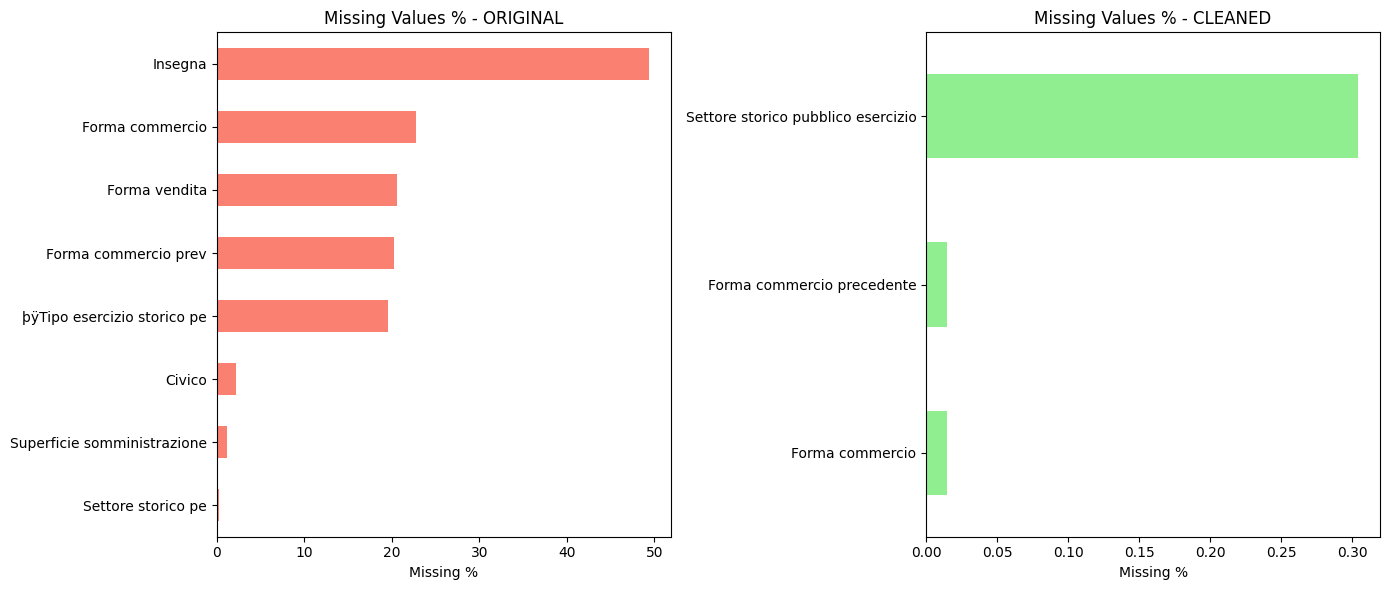

In [21]:
# Visual comparison of missing values
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original
orig_pct = (MILANO_ORIG.isnull().sum() / len(MILANO_ORIG) * 100).sort_values(ascending=True)
orig_pct[orig_pct > 0].plot(kind='barh', ax=axes[0], color='salmon')
axes[0].set_title('Missing Values % - ORIGINAL')
axes[0].set_xlabel('Missing %')

# Cleaned
clean_pct = (MILANO_CLEAN.isnull().sum() / len(MILANO_CLEAN) * 100).sort_values(ascending=True)
if clean_pct[clean_pct > 0].empty:
    axes[1].text(0.5, 0.5, 'No Missing Values!\n✓ 100% Complete', 
                 ha='center', va='center', fontsize=16, color='green',
                 transform=axes[1].transAxes)
    axes[1].set_xlim(0, 1)
else:
    clean_pct[clean_pct > 0].plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Missing Values % - CLEANED')
axes[1].set_xlabel('Missing %')

plt.tight_layout()
plt.show()

---
# 9. DATA QUALITY SUMMARY

In [23]:
print("=" * 60)
print("FINAL DATA QUALITY SUMMARY")
print("=" * 60)

print(f"\n DATASET SIZE:")
print(f"   Rows: {MILANO_CLEAN.shape[0]:,}")
print(f"   Columns: {MILANO_CLEAN.shape[1]}")
print(f"   Total cells: {MILANO_CLEAN.shape[0] * MILANO_CLEAN.shape[1]:,}")

completeness = 100 - (MILANO_CLEAN.isnull().sum().sum() / (MILANO_CLEAN.shape[0] * MILANO_CLEAN.shape[1]) * 100)
print(f"\n COMPLETENESS: {completeness:.2f}%")

print(f"\n NUMERICAL COLUMNS: {len(NUM)}")
for col in NUM:
    print(f"   - {col}: range [{MILANO_CLEAN[col].min():.2f}, {MILANO_CLEAN[col].max():.2f}]")

print(f"\n CATEGORICAL COLUMNS: {len(CAT)}")
for col in CAT[:5]:  # Show first 5
    print(f"   - {col}: {MILANO_CLEAN[col].nunique()} unique values")
if len(CAT) > 5:
    print(f"   ... and {len(CAT) - 5} more columns")

# Check for duplicates
n_duplicates = MILANO_CLEAN.duplicated().sum()
print(f"\n DUPLICATES: {n_duplicates}")

print("\n" + "=" * 60)
print("Data cleaning pipeline completed successfully!")
print("=" * 60)

FINAL DATA QUALITY SUMMARY

 DATASET SIZE:
   Rows: 6,903
   Columns: 16
   Total cells: 110,448

 COMPLETENESS: 99.98%

 NUMERICAL COLUMNS: 3
   - Codice via: range [1.00, 7602.00]
   - ZD: range [1.00, 9.00]
   - Superficie somministrazione: range [2.00, 2336.00]

 CATEGORICAL COLUMNS: 13
   - Tipo esercizio storico pubblico esercizio: 23 unique values
   - Insegna: 2883 unique values
   - Indirizzo: 6278 unique values
   - Tipo via: 16 unique values
   - Nome via: 1840 unique values
   ... and 8 more columns

 DUPLICATES: 0

Data cleaning pipeline completed successfully!
